In [427]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd

(0, 100)

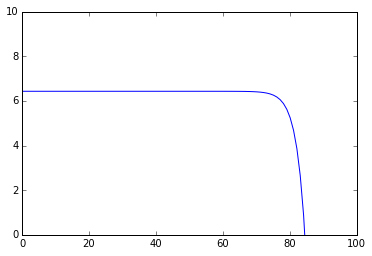

In [428]:
V = np.linspace(0,1000,1000)
plt.plot(V, 6.43 - 5e-14*(np.exp(V/2.6) - 1)) #in V and A
plt.ylim(0,10)
plt.xlim(0,100)

(0, 100)

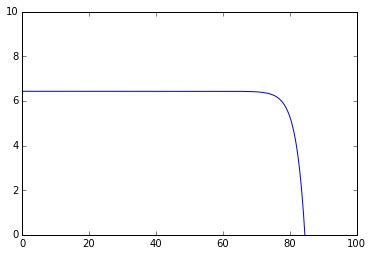

In [429]:
V = np.linspace(0,100,1000)
I_o = 5e-14 #A
I_L = 6.43 #A
R_s = 0 #ohm
R_sh = 1e6 #ohm
plt.plot(V, I_L - I_o*(np.exp(V/2.6) - 1)) #in V and A
plt.ylim(0,10)
plt.xlim(0,100)

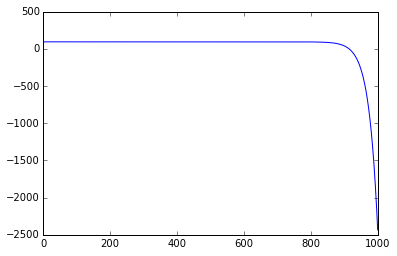

In [430]:
I = 100
plt.plot(I - I_L - I_o*(np.exp((V+I*R_s)/2.6) - 1)) #this 

In [431]:
from sympy import solve, Symbol, exp
x = Symbol('x')
y = Symbol('y')
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

{x: -3, y: 1}

In [433]:
V = Symbol('V')
I = Symbol('I')
I_o = 5e-14 #A
I_L = 6.43 #A
R_s = 10 #mohm
R_sh = 1e5 #mohm
n = 1

#solve(I - I_L - I_o*(exp( (V + I * R_s) /(26*n)) - 1) , I)

In [434]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y = p
    return (x+y**2-4, math.exp(x) + x*y - 3)

x, y =  fsolve(equations, (1, 1))

print equations((x, y))

(4.4508396968012676e-11, -1.0512035686360832e-11)


In [435]:
import scipy.optimize as optimize
from math import sqrt

def f(c):
    return sqrt(c[0]**2 + c[1]**2 + (c[2]-2)**2)

result = optimize.minimize(f, [1,1,1])
print result.values()[6]

[ -7.29867252e-09  -7.29867252e-09   1.99999999e+00]


In [436]:
import scipy.optimize as optimize
from math import sqrt

# I, c[0]
I_L = 6.43 #A
# I_o = 5e-14 #A,  c[2]
# n = 1, c[2]
V = 1 #mV
# R_s = 1 #mohm, c[3]
# R_sh = 1e5 #mohm c[4]


def f(c):
    
    
    I - I_L - I_o*(exp( (V + I * R_s) /(26*n)) - 1)
    return I 

result = optimize.minimize(f, [1,1,1])
print result.values()[6]

[ 1.  1.  1.]


In [437]:
irrad_df = pd.read_csv('data/ASTMG173.csv')

In [438]:
irrad_df.head()

,wavelength,etr,globaltilt,directcircum
0,280.0,0.082,4.730000e-23,2.540000e-26
1,280.5,0.099,1.230000e-21,1.090000e-24
2,281.0,0.150,5.690000e-21,6.130000e-24
3,281.5,0.212,1.570000e-19,2.750000e-22
4,282.0,0.267,1.190000e-18,2.830000e-21


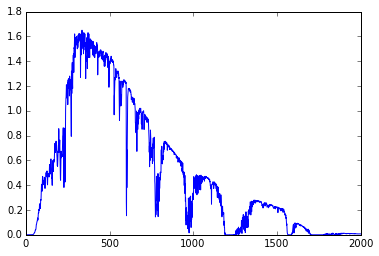

In [439]:
irrad_df['globaltilt'].plot()

In [440]:
eqe_df = pd.read_csv('data/eqe_sunpower_25.csv')

In [441]:
eqe_df.head()

,wavelength,percent
0,299.768250,64.683427
1,303.939745,67.215777
2,308.806489,70.355838
3,322.016223,73.598574
4,331.054461,76.840606


In [442]:
eqe_df['percent'].values

array([ 64.68342696,  67.21577658,  70.35583848,  73.5985743 ,
        76.84060607,  79.57642607,  86.66984467,  93.45970049,
        95.99603972,  97.11454009,  98.13494287,  98.5429397 ,
        98.44707159,  98.75345058,  98.95762501,  99.26916702,
        98.7698784 ,  98.77257726,  98.97862916,  98.58530003,
        98.79158661,  98.79510685,  98.79804039,  98.80038723,
        99.00585241,  99.00972469,  98.81118266,  98.51125746,
        97.70465113,  96.39218505,  93.15578568,  89.20935213,
        86.47705238,  75.84824794,  69.976473  ,  66.02839667,
        39.80782375,  33.63236869,  24.21722868,   8.42457134,   1.44074981])

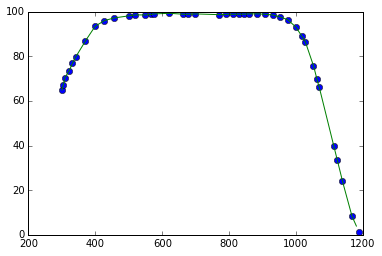

In [443]:
from scipy import interpolate
x = eqe_df['wavelength'].values
y = eqe_df['percent'].values
f = interpolate.interp1d(x, y)

wav_new = np.arange(300,1180, 0.5)
eqe_new = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', wav_new, eqe_new, '-')
plt.show()

In [444]:
irrad_df[irrad_df['wavelength']==300]

,wavelength,etr,globaltilt,directcircum
40,300,0.458,0.00102,0.000456


In [445]:
irrad_df[irrad_df['wavelength']==1180]

,wavelength,etr,globaltilt,directcircum
1020,1180,0.522,0.441,0.421


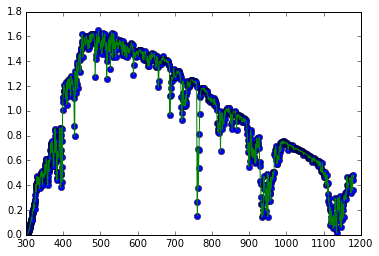

In [448]:
from scipy import interpolate

x = irrad_df['wavelength'][40:1021].values
irrad_global = irrad_df['globaltilt'][40:1021].values #AM1.5 spectrum

f = interpolate.interp1d(x, irrad_global)
wav_new = np.arange(300,1180, 0.5) #300 nm to 1180 nm with 0.5 nm spacing
irrad_new = f(xnew)   #recreate AM1.5 with 0.5 nm spacing

plt.plot(x, irrad_global, 'o', wav_new, irrad_new, '-')
plt.show()

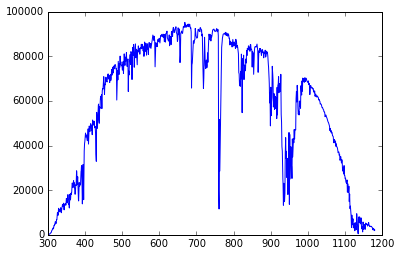

In [449]:
plt.plot(wav_new,eqe_new*irrad_new*wav_new)

In [450]:
(1/1240)*sum(eqe_new*irrad_new*wav_new)*.5/1e3 #mA/cm^2

41.796068304420977

In [451]:
iv_df = pd.read_csv('data/i_v_sunpower_25.csv')

(0, 50)

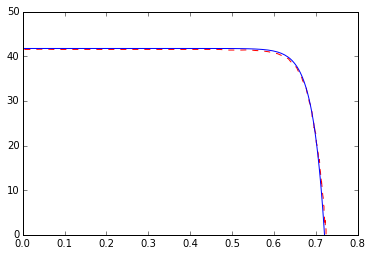

In [465]:
plt.plot(iv_df.voltage,iv_df.current, 'r--')
I_o = 3.6e-10 #mA/cm^2
I_L = 41.74 #mA/cm^2
plt.plot(iv_df.voltage, I_L - I_o*(np.exp(iv_df.voltage/.0283) - 1)) #in V and A
plt.ylim(0,50)